# Modelo GMM
Modelos de mistura gaussiana (GMM)

=============================================== \\
Equipe: \\
Claudia \\
Patricia \\
Paulo Sérgio de Castro Nascimento 

===============================================

Apresentação do modelo GMM: ideias, matemática, algoritmo EM e implementação de python


## Algoritmo EM
O algoritmo EM é um algoritmo iterativo usado para encontrar estimativas de máxima verossimilhança (MLE) de modelos onde os parâmetros não podem ser encontrados diretamente, como nosso caso aqui. Consiste em duas etapas: etapa de execução e etapa de maximização.

**Parte 1 - Etapa de expectativa**\
Calcular os valores de associação $r_{ ic}$. Esta é a probabilidade de que o ponto de dados $x_i$ pertença ao cluster $c$ .

$ r_{ic}=\frac{\pi_c N(x_i|\mu_c,\Sigma_c)}{\sum_{c=1}^{N_c}N(x_i|\mu_c,\Sigma_c)}$

$N_c$: nº de classes \
$\mu_c$: vetor de médias da classe $c$\
$\Sigma_c$: matriz de covariância da classe $c$

**Parte 2 - Etapa de maximização**\
Calcular a atualização dos parâmentros do modelo $\pi_c, \mu_c, \Sigma_c$.

$m_c=\sum_{c=1}^{N_c}r_{ic}$\
$\pi_c=\frac{m_c}{N_i} $ \
$\mu_c=\frac{1}{m_c} \sum_{i=1}^{N_i} r_{ic} x_i$\
$\Sigma_c=\frac{1}{m_c} \sum_{i=1}^{N_i} r_{ic} (x_i -\mu_c)^T (x_i -\mu_c)$

$N_i$: nº de amostras \

Repetir as etapas de E e M até que o valor de log da verossimilhança L convirja.



## Implementação em python
Implementação básica para GMM em python para problemas unidimensionais.

###Definindo as bibliotecas necessárias

In [ ]:
############################################################
############################################################
# Definindo bibliotecas
import random
import numpy as np
import pandas as pd
random.seed(42) # define a seed (importante para reproduzir resultados
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
############################################################

###Gerando os dados

In [ ]:
############################################################
############################################################
# Definindo dados de entrada
Namostra=100
NClusters=3
max_iterations = 10

mean = [-10,0,15]
var = [1.5,1,1.5]

xc1 = np.random.normal(mean[0], var[0],int(Namostra/NClusters))
xc2 = np.random.normal(mean[1], var[1],int(Namostra/NClusters))
xc3 = np.random.normal(mean[2], var[2],int(Namostra/NClusters))
xt = np.hstack((xc1,xc2,xc3))
y = np.ones(int(Namostra/NClusters))
y = np.hstack((y,y*2,y*3))

############################################################

###Parâmetros de inicialização para GMM: μ, π, Σ.

In [ ]:
############################################################
############################################################
# Inicialização dos parâmetros
pi0 = np.array([1/3, 1/3, 1/3])
mu0 = np.array([-8,2,16])
var0 = np.array([1,1,1])

r = np.zeros((len(xt), 3))
############################################################

###Execução da 1ª iteração do algoritmo EM

In [ ]:
############################################################
############################################################
# Simulando a 1ª iteração

pi=pi0
mu=mu0
var=var0
gauss1 = norm(loc=mu[0], scale=var[0])
gauss2 = norm(loc=mu[1], scale=var[1])
gauss3 = norm(loc=mu[2], scale=var[2])

**Etapa de expectativa**\
$ r_{ic}=\frac{\pi_c N(x_i|\mu_c,\Sigma_c)}{\sum_{c=1}^{N_c}N(x_i|\mu_c,\Sigma_c)}$

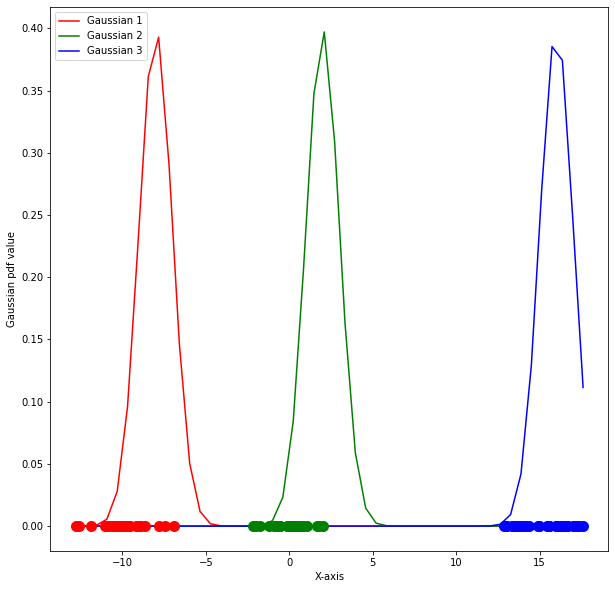

In [ ]:
################################
################################
# E-Step
for c,g,p in zip(range(3), [gauss1, gauss2, gauss3], pi):
    r[:,c] = p*g.pdf(xt[:])

for i in range(len(r)):
    r[i,:] /= np.sum(r[i,:])

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(xt[i],0,c=['r','g','b'][int(y[i]-1)],s=100) 

for g,c in zip([gauss1.pdf(np.linspace(np.min(xt),np.max(xt))),gauss2.pdf(np.linspace(np.min(xt),np.max(xt))),gauss3.pdf(np.linspace(np.min(xt),np.max(xt)))],['r','g','b']):
    ax0.plot(np.linspace(np.min(xt),np.max(xt)),g,c=c,zorder=0)

ax0.set_xlabel('X-axis')
ax0.set_ylabel('Gaussian pdf value')
ax0.legend(['Gaussian 1', 'Gaussian 2', 'Gaussian 3'])

plt.show()
################################

**Etapa de maximização**\
$m_c=\sum_{c=1}^{N_c}r_{ic}$\
$\pi_c=\frac{m_c}{N_i} $ \
$\mu_c=\frac{1}{m_c} \sum_{i=1}^{N_i} r_{ic} x_i$\
$\Sigma_c=\frac{1}{m_c} \sum_{i=1}^{N_i} r_{ic} (x_i -\mu_c)^T (x_i -\mu_c)$

In [ ]:
################################
################################
# M-Step
mc = np.sum(r, axis=0)
pi = mc/len(xt)
mu = np.sum(r*np.vstack((xt, xt, xt)).T, axis=0)/mc

var = []
for c in range(len(pi)):
    var.append(np.sum(np.dot(r[:,c]*(xt- mu[c]).T, (xt - mu[c])))/mc[c])  
    
print(pi)    
print(mu)    
print(var)   
################################    
############################################################

[0.33556454 0.33110213 0.33333333]
[-10.19622745  -0.13540785  14.93764139]
[2.2562751928723093, 0.8577974113795975, 2.4292300350267415]


###Criação de uma função do processo iterativo

In [ ]:
############################################################
############################################################
# Classe GMM    
class GMM:
    ##############################################
    ##############################################
    # Classe GMM para dados 1 dimensão    
    def __init__(self, X, max_iterations):
        #Inicializar dados e max_iterations
        self.X = X       
        self.max_iterations = max_iterations
    ##############################################  
    
    ##############################################
    ##############################################
    def Initialization(self, X,pi,mu,var):
        #Inicialize os parâmetros e execute as etapas E e M armazenando o valor de log da verossimilhança após cada iteração"
        self.pi = pi
        self.mu = mu
        self.var = var
    ##############################################    
     
    ##############################################
    ##############################################
    def run(self):
        #Execução dos passos EM
        
        r = np.zeros((len(self.X), 3))
        
        for itr in range(self.max_iterations):
    
            gauss1 = norm(loc=self.mu[0], scale=self.var[0])
            gauss2 = norm(loc=self.mu[1], scale=self.var[1])
            gauss3 = norm(loc=self.mu[2], scale=self.var[2])
            
            ################################
            ################################
            # E-Step
            for c,g,p in zip(range(3), [gauss1, gauss2, gauss3], self.pi):
                r[:,c] = p*g.pdf(xt[:])

            for i in range(len(r)):
                r[i,:] /= np.sum(r[i,:])

            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)

            for i in range(len(r)):
                ax0.scatter(xt[i],0,c=['r','g','b'][int(y[i]-1)],s=100) 

            x=self.X
            for g,c in zip([gauss1.pdf(np.linspace(np.min(x),np.max(x))),gauss2.pdf(np.linspace(np.min(x),np.max(x))),gauss3.pdf(np.linspace(np.min(x),np.max(x)))],['r','g','b']):
                ax0.plot(np.linspace(np.min(x),np.max(x)),g,c=c,zorder=0)

            ax0.set_title("Iteration " + str(itr))
            plt.show()

            MCov_Corr = 1e-6*np.identity(1)
            ################################
            
            ################################
            ################################
            # M-Step
            mc = np.sum(r, axis=0)
            self.pi = mc/len(self.X)
            self.mu = np.sum(r*np.vstack((self.X, self.X, self.X)).T, axis=0)/mc
            self.var = []

            for c in range(len(self.pi)):
                self.var.append(np.sum(np.dot(r[:,c]*(self.X - self.mu[c]).T, (self.X - self.mu[c])))/mc[c])
                # var.append(np.sum(np.dot(r[:,c]*(self.X - mu[c]).T, (self.X  - mu[c])))/mc[c])
                # covc = 1/mc[c] * (np.dot( ( r[:, c].reshape(1, 60) * (self.X-self.mu[c]) ) , (self.X- self.mu[c]) )) + MCov_Corr
            ################################
    ##############################################     
############################################################

###Execução do mo modelo GMM

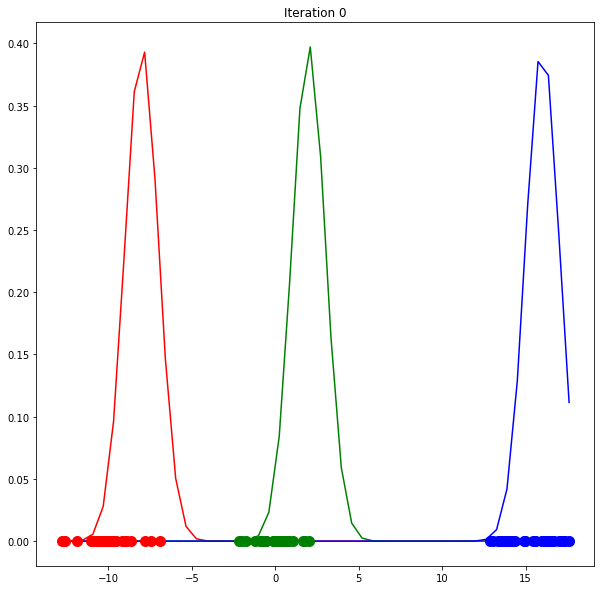

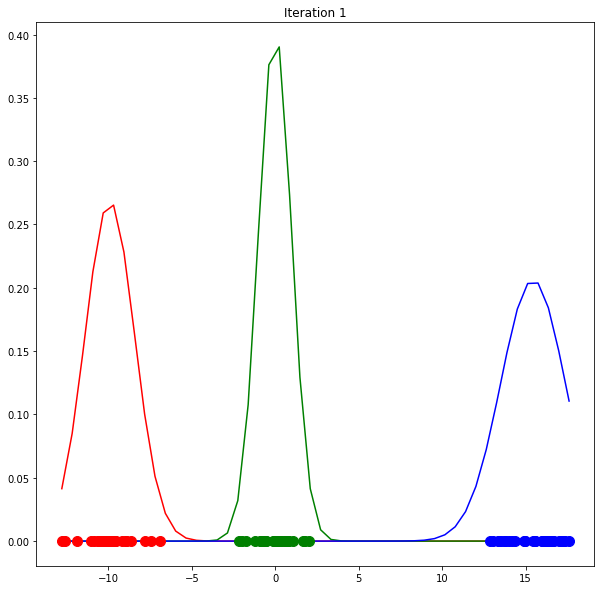

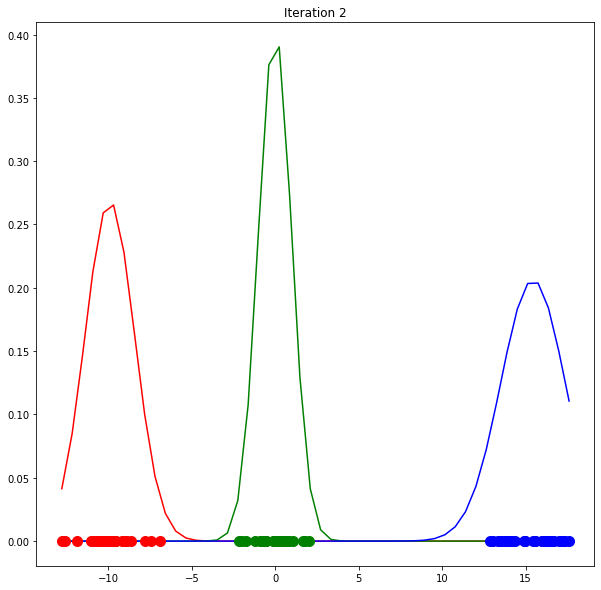

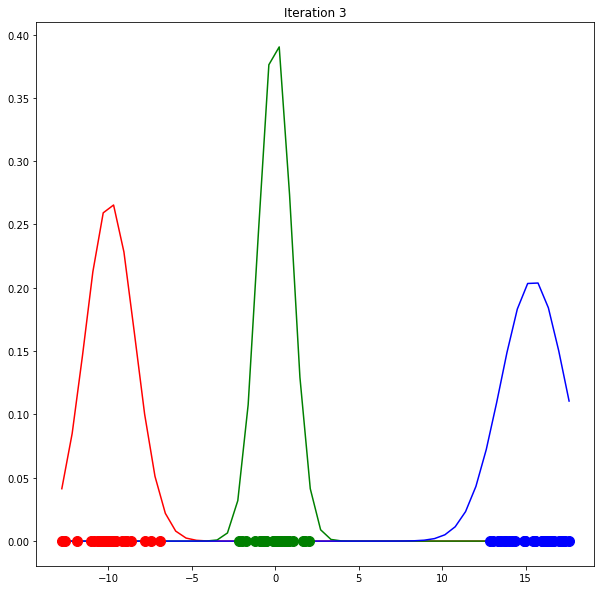

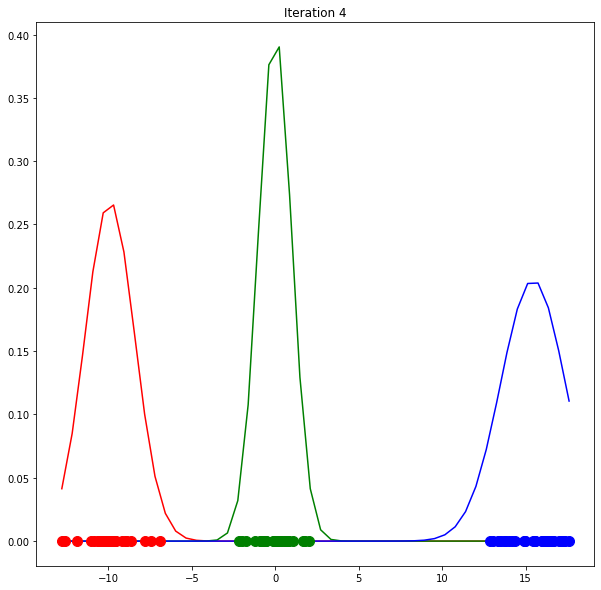

[-9.9119968  -0.01672966 15.43734226]
[1.4859954154698904, 0.9897795506129905, 1.9345400175204976]


In [ ]:
############################################################
############################################################
# Execução do modelo GMM            
gmm = GMM(xt, 5)
gmm.Initialization(xt,pi0,mu0,var0)
gmm.run()
print(gmm.mu)
print(gmm.var)
############################################################